# **Modelagem Matemática e Computacional - Aula prática 3**
### Nome: Riquelme Freitas Gomes
### Data: 27/08/2023
<br>

# **Objetivo:**
> ### Estudar e pôr em prática a análise de dados utilizando o método PCA.

# **PCA - Análise de componentes principais**

> #### O PCA, ou Análise de Componentes Principais (Principal Component Analysis, em inglês), é uma técnica estatística utilizada para analisar e reduzir a dimensionalidade de dados complexos, preservando a maior parte da variação presente nos dados originais. É amplamente utilizado em áreas como estatística, análise de dados, aprendizado de máquina e processamento de imagens.

<br>

#### O objetivo principal do PCA é transformar um conjunto de dados multidimensionais em um novo conjunto de dados com menos dimensões (chamadas de **componentes principais**) de forma que a maior parte da variabilidade dos dados originais seja mantida. Isso é feito através de uma combinação linear das variáveis originais, criando assim os componentes principais. Os primeiros componentes principais retêm a maior parte da variabilidade, enquanto os últimos contêm menos informação e, frequentemente, representam ruído ou variação não relevante.
<br>

#### Passos básicos do método PCA:
1. #### **Padronização dos dados:** Primeiro, os dados são normalizados para que todas as variáveis tenham média zero e desvio padrão igual a um. Isso é importante para garantir que todas as variáveis tenham a mesma escala e evita que uma variável com grande magnitude domine a análise.

2. #### **Cálculo da matriz de covariância ou matriz de correlação:** Em seguida, é calculada a matriz de covariância (ou matriz de correlação) dos dados. Isso ajuda a entender como as variáveis originais estão relacionadas entre si.

3. #### **Cálculo dos autovalores e autovetores:** O PCA envolve a diagonalização da matriz de covariância para encontrar seus autovalores e autovetores. Os autovetores são as direções no espaço de dados que explicam a maior variação dos dados, enquanto os autovalores indicam a quantidade de variação explicada por cada autovetor.

4. #### **Seleção dos componentes principais:** Os autovetores são ordenados de acordo com seus autovalores, e os primeiros autovetores (componentes principais) são escolhidos. Geralmente, você seleciona um número menor de componentes principais que capturam a maior parte da variabilidade dos dados.

5. #### **Projeção dos dados nos componentes principais:** Os dados originais são projetados nos componentes principais selecionados, criando um novo conjunto de dados com menos dimensões.
<br>

#### O PCA é frequentemente usado em tarefas como redução de dimensionalidade para visualização de dados, remoção de redundância em conjuntos de dados, compressão de dados e também como uma etapa de pré-processamento antes de aplicar algoritmos de aprendizado de máquina, ajudando a melhorar o desempenho e a eficiência desses algoritmos.
<br>

#### **Observações**:
* #### PCA é uma técnica de redução de dimensionalidade que permite transformar um conjunto de dados de alta dimensão em um conjunto de dados de baixa dimensão, preservando a maior parte da informação dos dados originais.

* #### O objetivo do PCA é encontrar uma nova base para os dados que explique a maior variação possível nos dados. Essa nova base é composta pelos componentes principais, que são combinações lineares das variáveis originais.

* #### A projeção dos dados na nova base permite visualizar e analisar os dados de forma mais simples e eficiente.

## **Conceitos importantes**


### **Média**
> #### A média é uma medida estatística que representa o valor central de um conjunto de números. É amplamente utilizada para resumir e descrever um conjunto de dados, proporcionando uma noção de "tendência central" ou "valor típico" dos números em questão. A média é calculada somando todos os valores em um conjunto de dados e dividindo esse total pelo número de valores no conjunto.

<br>

### **Desvio padrão**
> #### O desvio padrão é uma medida estatística que quantifica a dispersão ou a variabilidade dos valores em um conjunto de dados. Ele fornece uma ideia de quão afastados os valores individuais estão em relação à média aritmética (ou média) desse conjunto de dados. Um desvio padrão maior indica que os valores estão mais dispersos em torno da média, enquanto um desvio padrão menor indica que os valores estão mais próximos da média.

<br>

### **Covariância**
> #### A covariância é uma medida estatística que descreve como duas variáveis aleatórias diferentes mudam juntas. Em outras palavras, ela indica se as duas variáveis têm um relacionamento linear positivo, um relacionamento linear negativo ou se são independentes uma da outra.

<br>

### **Matriz de covariância**
> #### A matriz de covariância é uma matriz quadrada que descreve as covariâncias entre todas as combinações possíveis de pares de variáveis em um conjunto de dados multivariado. É uma ferramenta fundamental na análise estatística e multivariada, pois fornece informações sobre como as variáveis em um conjunto de dados se relacionam linearmente entre si.

<br>

### **Autovetores e autovalores**
> #### Um **autovetor** é um vetor que mantém sua direção sob uma transformação linear. Em outras palavras, quando multiplicado por uma matriz, o autovetor é apenas escalado (ou seja, alongado ou encurtado), mas sua direção não muda. Isso significa que o autovetor não é "torcido" pela matriz, apenas esticado ou encolhido. Já o **autovalor** é um escalar que representa o fator pelo qual um autovetor é esticado ou encolhido quando multiplicado por uma matriz. Os autovalores indicam quanta variação ou escala ocorre na direção dos autovetores sob a ação da matriz.

## **1. Dataset de alimentos do Reino Unido**

#### Para praticar o uso do método PCA vamos utilizar dados do DEFRA que mostram o consumo em gramas (por pessoa, por semana) de 17 tipos diferentes de alimentos medidos e calculados em média nos quatro países do Reino Unido em 1997. Diremos que os 17 tipos de alimentos são as variáveis e os 4 países são as observações.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# Carrega o conjunto de dados
url = "https://bioboot.github.io/bggn213_f17/class-material/UK_foods.csv"
df = pd.read_csv(url, index_col=0)

# Transpõe e mostra os dados
df = df.transpose()
df

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


#### Apenas olhando os valores da tabela é difícil de obter análises e interpretações muito aprofundadas sobre as quantidades, os alimentos e os países, isto é, apenas os números da tabela acima não revelam muito. Na verdade, em geral, é difícil extrair significado de qualquer conjunto de números. Dado que este é um conjunto de dados relativamente pequeno, vemos que um método analítico poderoso é absolutamente necessário se quisermos observar tendências e padrões em dados maiores.

#### Até mesmo com o uso de gráfico de barras, ainda é difícil identificar as características distintivas da dieta de cada país:
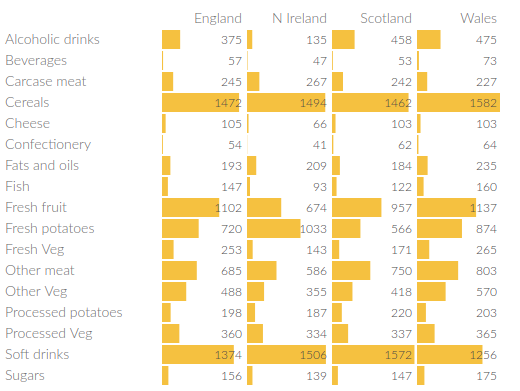


### Padronizando os dados

#### Como o PCA produz um subespaço de características que maximiza a variância ao longo dos eixos, faz sentido padronizar os dados, especialmente se eles foram medidos em escalas diferentes. Embora todas as características do conjunto de dados de alimentos do Reino Unido tenham sido medidas em gramas, algumas características tendem a assumir valores maiores do que outras.

In [ ]:
# Converte os dados em array numpy
X = df.values

# Normaliza os dados
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# Cria um novo dataframe com os dados normalizados
df = pd.DataFrame(data = scaled_X, columns=df.columns,index=df.index)
df

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,0.658275,-0.017495,-0.259546,0.644585,-0.632429,0.130551,-0.450076,0.863312,0.377736,-0.336265,0.805477,0.737407,-0.644322,-0.051917,-0.435231,0.104998,-0.138303
Wales,0.535805,-1.277169,1.198856,1.152440,1.535899,1.547958,0.435696,1.093528,1.401682,0.084066,1.171603,0.929297,1.679463,1.609440,-1.404236,0.841823,0.968122
Scotland,0.535805,-0.227441,0.543811,-0.332059,-1.097071,-0.540853,-1.335847,-0.709834,-0.496364,1.513193,-0.878702,-0.057567,-0.855575,-0.467257,1.190727,0.716563,0.746837
N.Ireland,-1.729885,1.522105,-1.483121,-1.464967,0.193601,-1.137656,1.350227,-1.247006,-1.283054,-1.260994,-1.098378,-1.609137,-0.179565,-1.090266,0.648741,-1.663384,-1.576656


### Projeção PCA em 2D

In [ ]:
# Instancia objeto PCA com 2 componentes;
pca = PCA(n_components=2)

# aplica fit_transform a scaled_x para representar os dados em termos dos 2 primeiros componentes
pca_decomp = pca.fit(scaled_X)
pca_x = pca_decomp.transform(scaled_X)

# cria um dataframe para ver os dados transformados
principalDf = pd.DataFrame(data = pca_x, columns = ['PC 1', 'PC 2'], index=df.index)
principalDf

,PC 1,PC 2
England,-0.954490,0.328318
Wales,-4.520951,-1.735380
Scotland,0.487978,3.233672
N.Ireland,4.987462,-1.826611


England -0.9544898377790784
Wales -4.520950935571346
Scotland 0.48797834944519025
N.Ireland 4.987462423905235



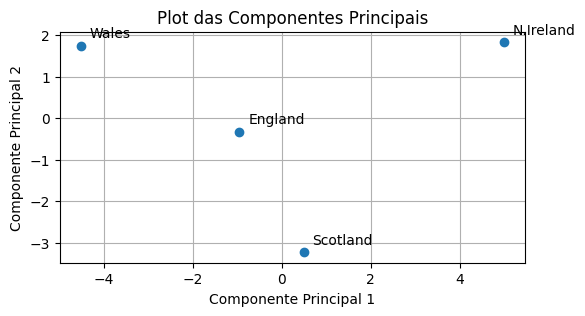

In [ ]:
# Projeção 2d
for index, series in principalDf.iterrows():
  print(index,series[0])
print()

fig, ax = plt.subplots(1,1, figsize=(6,3))
ax.scatter(principalDf['PC 1'],-principalDf['PC 2'])

for index, series in principalDf.iterrows():
    ax.text(series[0]+0.2,-series[1]+0.2, index)

ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_title('Plot das Componentes Principais')
ax.grid()

Com os números juntos ao gráfico, agora já é possível interpretar que a Irlanda do Norte (N.Ireland) tem a dieta mais diferente entre estes quatro países, possivelmente por conta de sua distância física para os demais.

<br>

Uma vez que cada componente é uma combinação linear dos recursos originais, podemos usar o objeto PCA para extraí-los.

In [ ]:
# cria dataframe com os componentes pca
pd.DataFrame(pca_decomp.components_, columns=df.columns)

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
0,-0.245721,0.285629,-0.264811,-0.286118,-0.127195,-0.281101,0.097759,-0.265450,-0.287086,-0.120738,-0.257678,-0.278905,-0.178440,-0.277475,0.22772,-0.255095,-0.252758
1,0.247080,-0.077170,0.136107,-0.011006,-0.400545,-0.136841,-0.454688,-0.096486,-0.092823,0.410361,-0.153960,0.081746,-0.329029,-0.137738,0.29324,0.232318,0.211057


#### Notamos que, por exemplo, o primeiro componente é caracterizado por um consumo maior de:
* carcass meat
* soft drinks

### Variância Explicada

####A variância explicada nos diz quanta informação (variância) pode ser atribuída a cada um dos componentes principais.

In [ ]:
# Imprime taxa de variância explicada
print(f"PC1: {pca.explained_variance_ratio_[0]}\nPC2: {pca.explained_variance_ratio_[1]}")
print(f"PC1 + PC2: {pca.explained_variance_ratio_.sum()}")

PC1: 0.6832787134067771
PC2: 0.2487128836656854
PC1 + PC2: 0.9319915970724626


Vemos que, juntos, os dois primeiros componentes principais contêm $93\%$ da informação. O primeiro componente principal contém $68\%$ da variância e o segundo componente principal contém $25\%$ da variância. Os outros $15$ componentes principais contêm o restante $(7\%)$ da variação do conjunto de dados.

<br>

Vamos criar um gráfico que nos mostre a quantidade de variância explicada por cada um dos 4 primeiros componentes principais.

Text(0, 0.5, 'Variância explicada')

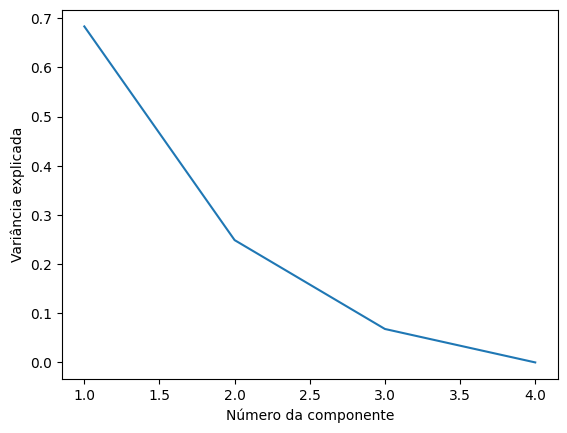

In [ ]:
N = 4
pca = PCA(n_components = N)
pca.fit(scaled_X)

fig, ax = plt.subplots(1,1)
ax.plot(np.arange(1, N+1), pca.explained_variance_ratio_)
ax.set_xlabel('Número da componente')
ax.set_ylabel('Variância explicada')

#### Aqui, notamos que trata-se de um caso onde os autovalores decaem rapidamente. Com isso, vemos que a componente $4$ já não é tão relevante pois a variância explicada nela é praticamente $0$, assim tomando somente $3$ componentes principais já teríamos bons resultados, uma vez que esses explicam quase toda a variância.

## **2. PCA para redução de dimensão em imagens**

#### A Análise de Componentes Principais (PCA) é uma técnica amplamente utilizada na redução de dimensão de imagens, que desempenha um papel crucial em áreas como processamento de imagens, visão computacional e reconhecimento de padrões. A PCA permite representar imagens em um espaço de menor dimensionalidade, preservando ao máximo as informações importantes, o que pode ser extremamente útil em várias aplicações.

Para aplicar a redução de dimensão em imagens com o PCA, optei por utilizar uma imagem do meu cachorro.

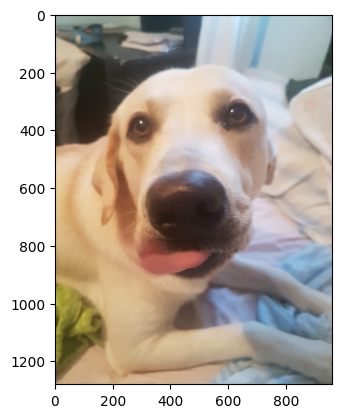


Dimensões: (1280, 960)


In [ ]:
import numpy as np
from PIL import Image

# Carregando imagem
img = Image.open('/content/drive/MyDrive/Colab Notebooks/Auxiliar/img2.jpg')
plt.imshow(img)
plt.show()

# Transformando em matriz e visualizando dimensões
I = np.array(img.convert('L'))
print("\nDimensões:", I.shape)

Observe que a matriz tem 1280 linhas e 960 colunas. Aplicaremos, em seguida, a técnica PCA.

In [ ]:
# Variância explicada de 0.99
lower_dimension_data = PCA(0.99) .fit_transform(I)
print("Dimensões:", lower_dimension_data.shape)

Dimensões: (1280, 27)


O número 0.99 passado como parâmetro para o método PCA diz que queremos um número de componentes que nos garanta 99% de variância explicada cumulativa. Observe que para isso, utilizou-se 27 componentes. Isso é uma redução imensa, uma vez que a original possuia 960 colunas. Queremos ver, caso necessário recuperar a imagem, como essas imagens ficam com a dimensão reduzida. Para isso serão necessários duas funções auxiliares.

In [ ]:
def pca_with_var_exp(X, var_exp):
    pca = PCA(var_exp)
    lower_dimension_data = pca.fit_transform(X)
    print(lower_dimension_data.shape)
    approximation = pca.inverse_transform(lower_dimension_data)
    return approximation

def plot_subplot(X, i):
    plt.subplot(3,2,i)
    plt.imshow(X, cmap="gray")
    plt.xticks([])
    plt.yticks([])

A primeira função reduz a imagem $X$ mantendo var_exp de variância explicada cumulativa. Compararemos $3$ valores: $0.99$, $0.90$ e $0.70$.

A segunda função serve para fazer o plot das imagens. Utilizaremos ela para comparar as imagens "reduzidas" com a original.

In [ ]:
# calculando algumas aproximações
img_1 = pca_with_var_exp(I, var_exp=0.99) # 99%
img_2 = pca_with_var_exp(I, var_exp=0.90) # 90%
img_3 = pca_with_var_exp(I, var_exp=0.70) # 70%

(1280, 27)
(1280, 7)
(1280, 3)


Vemos que quanto menor a porcentagem de variância explicada cumulativa que exigimos, menor é o número de componentes a serem consideradas.

PC1: 0.4405314287382413
PC2: 0.1692605851790162
PC3: 0.1238292506982046
PC4: 0.06923643063950306
PC5: 0.04969676824550003
PC6: 0.03328044465648314
PC7: 0.023606767071531004
PC8: 0.013756402836073817
PC9: 0.011340384206608748
PC10: 0.009180157057330041



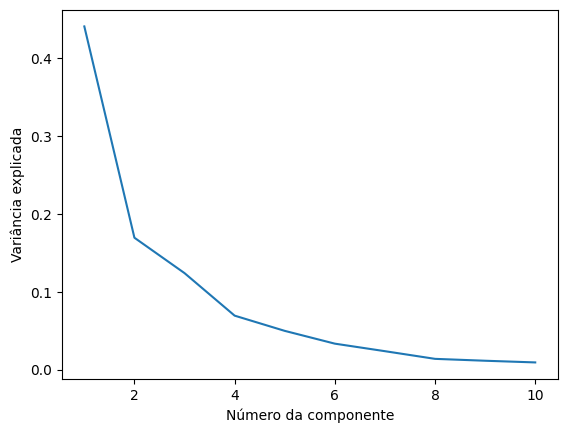

In [ ]:
# Aplicando PCA
N = 10
pca = PCA(n_components = N)
pca.fit(I)

# Imprime taxa de variância explicada
for n in range(N):
  print(f"PC{n+1}: {pca.explained_variance_ratio_[n]}")

print()
fig, ax = plt.subplots(1,1)
ax.plot(np.arange(1, N+1), pca.explained_variance_ratio_)
ax.set_xlabel('Número da componente')
ax.set_ylabel('Variância explicada')
plt.show()

Aqui vemos a influência de cada componente na imagem original. É perceptível pelo gráfico que a partir da PC4 a variância explicada vai se tornando muito pequena e pouco influente, e que a PC1 e a PC2 juntas somam aproximadamente $60\%$ do total.

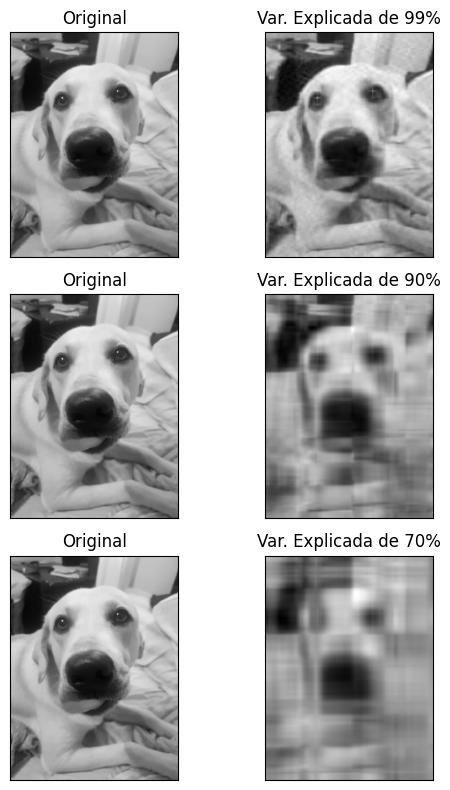

In [ ]:
# Visualizando aproximações
plt.figure(figsize=(6, 8))

plot_subplot(I, 1)
plt.title("Original")
plot_subplot(img_1, 2)
plt.title("Var. Explicada de 99%")
plot_subplot(I, 3)
plt.title("Original")
plot_subplot(img_2, 4)
plt.title("Var. Explicada de 90%")
plot_subplot(I, 5)
plt.title("Original")
plot_subplot(img_3, 6)
plt.title("Var. Explicada de 70%")

plt.tight_layout()
plt.show()

Nesse gráfico, é possível comparar a perda de qualidade e nitidez da imagem conforme reduzimos o número de componentes consideradas e, por consequência, a porcentagem da variância explicada. Essa "perda" de informações da imagem faz parte do processo de redução de dimensionalidade, por isso esse deve ser realizado com cuidado e considerando o contexto específico da aplicação.

# **Conclusão**

#### A Análise de Componentes Principais (PCA) é uma poderosa técnica estatística e matemática que desempenha um papel crucial em diversas áreas, desde a análise de dados até a visão computacional e o processamento de imagens. Portanto, tal método é uma técnica versátil e poderosa que se tornou indispensável em várias disciplinas devido à sua capacidade de simplificar a análise de dados de alta dimensionalidade, destacar informações relevantes e facilitar a tomada de decisões informadas. À medida que a quantidade de dados continua a crescer em nossas vidas cotidianas e nas áreas de pesquisa e negócios, a aplicação do PCA continuará a desempenhar um papel fundamental na extração de insights e na resolução de problemas complexos.

# **Fontes e referências**

1. Análise de Componentes Principais (PCA). http://profs.ic.uff.br/~aconci/PCA-ACP.pdf
2. DCC639: Análise de Componentes Principais (PCA). https://www.youtube.com/watch?v=DZ-X9D_BRdM
3. Principal Component Analysis (PCA) in Python Tutorial. https://www.datacamp.com/tutorial/principal-component-analysis-in-python
4. PCA na mão e no Python. https://leandrocruvinel.medium.com/pca-na-mão-e-no-python-d559e9c8f053
5. Principal Component Analysis
in 3 Simple Steps. https://sebastianraschka.com/Articles/2015_pca_in_3_steps.html